In [14]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance


In [15]:
df = pd.read_csv(os.getcwd() + '/DATABASE/base-reduzida-v4.csv', sep = ',')
df = df.drop(df.columns[0], axis=1)
df.head()

,Estado de saúde,Pouco Interesse em atividades,Frequência de consumo de bebida,Qtde dias na semana que bebe,Qtde doses quando bebe,Qtde faltas no trabalho por bebida nos últimos 12M,Aviso bebida últimos 12M,Dirigir embriagado nos últimos 12M,Falta de memória após beber nos últimos 12M,Mais de 5 doses em uma ocasião nos últimos 30D,...,Diagnóstico de outras doenças mentais,Motivo impedimento atividade habitual últimas 2S,Problemas com cansaço,Problemas para dormir,Sentimento depressivo,Sentimento de fracasso,Ideação suicida,Diagnóstico de depressão,Diagnóstico de alcoolismo,Alcoolismo e Depressão
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1,1.0,1.0,2.0,0.0,12.0,1.0,1.0,2.0,1.0,2.0,...,2.0,0.0,1.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0
2,1.0,1.0,2.0,0.0,10.0,1.0,1.0,2.0,1.0,2.0,...,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [16]:
# Função para normalizar usando Min-Max
def minmax_scaling(df):
    return (df - df.min()) / (df.max() - df.min())

# Aplicando a normalização Min-Max ao DataFrame
df = minmax_scaling(df)

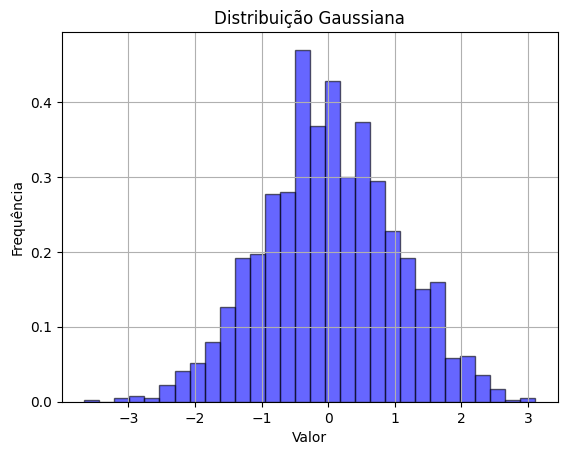

In [17]:
# Parâmetros da distribuição gaussiana
mu = 0  # Média
sigma = 1  # Desvio padrão
tamanho_amostra = len(df)  # Tamanho da amostra

# Gerar dados normalmente distribuídos
dados = np.random.normal(mu, sigma, tamanho_amostra)

# Traçar um histograma para visualizar a distribuição
plt.hist(dados, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.title('Distribuição Gaussiana')
plt.grid(True)
plt.show()

In [18]:
#Randomizando os dados do Dataframe
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

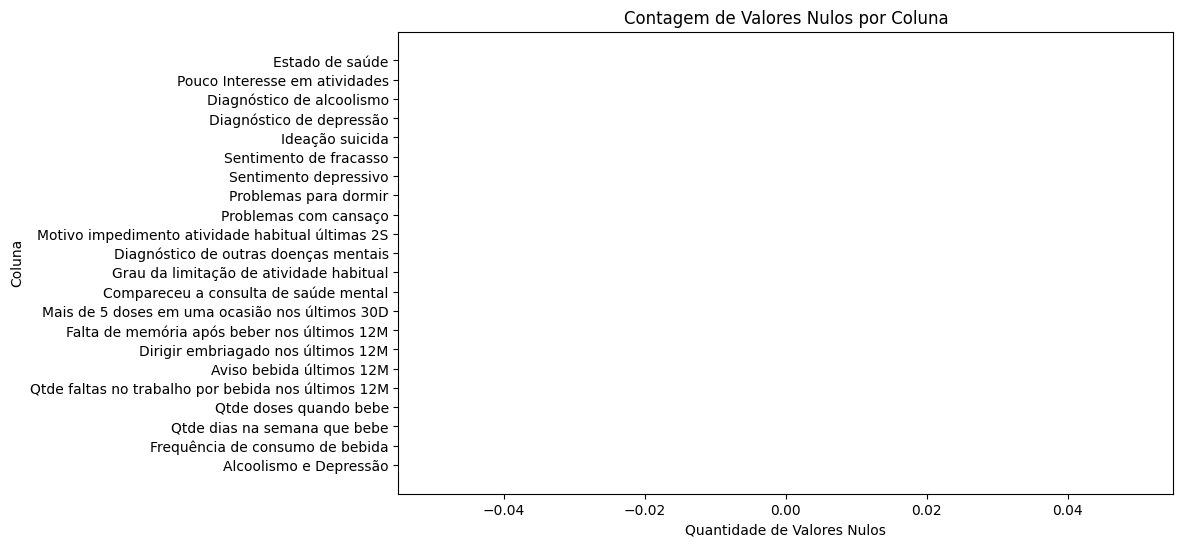

In [19]:
# Suponha que você já tenha executado df.isnull().sum()
null_counts = df.isnull().sum()

# Crie um DataFrame com as contagens de valores nulos
null_counts_df = pd.DataFrame({'Coluna': null_counts.index, 'Valores Nulos': null_counts.values})

# Ordene o DataFrame por contagem de valores nulos (opcional)
null_counts_df = null_counts_df.sort_values(by='Valores Nulos', ascending=False)

# Plote o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(null_counts_df['Coluna'], null_counts_df['Valores Nulos'], color='skyblue')
plt.xlabel('Quantidade de Valores Nulos')
plt.ylabel('Coluna')
plt.title('Contagem de Valores Nulos por Coluna')
plt.gca().invert_yaxis()  # Inverte a ordem das colunas para a mais alta no topo
plt.show()

In [20]:
# array = df.values
# array
# X = array[:,0:len(df.columns)-1]
# Y = array[:,len(df.columns)-1]

X = df.drop("Alcoolismo e Depressão", axis=1)
Y = df["Alcoolismo e Depressão"]


print("X:", len(X), "Y:", len(Y))

X: 1614 Y: 1614


In [21]:
test_size = 0.4
seed = 101

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [22]:
# Definir os hiperparâmetros e o modelo XGBRegressor
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42, n_jobs=-1, early_stopping_rounds=10 )


# Ajustar o modelo com dados de treinamento e validação
model.fit(X_train, Y_train, eval_set=[(X_test, Y_test)], verbose=True)

# Realizar a predição nos dados de teste
y_pred_xgb = model.predict(X_test)
predictions = [round(value) for value in y_pred_xgb]

# Avaliar a precisão
accuracy_xgb = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy_xgb * 100.0))

[0]	validation_0-rmse:0.45011
[1]	validation_0-rmse:0.40519
[2]	validation_0-rmse:0.36475
[3]	validation_0-rmse:0.32835
[4]	validation_0-rmse:0.29559
[5]	validation_0-rmse:0.26609
[6]	validation_0-rmse:0.23953
[7]	validation_0-rmse:0.21563
[8]	validation_0-rmse:0.19411
[9]	validation_0-rmse:0.17474
[10]	validation_0-rmse:0.15730
[11]	validation_0-rmse:0.14160
[12]	validation_0-rmse:0.12747
[13]	validation_0-rmse:0.11475
[14]	validation_0-rmse:0.10330
[15]	validation_0-rmse:0.09299
[16]	validation_0-rmse:0.08371
[17]	validation_0-rmse:0.07536
[18]	validation_0-rmse:0.06784
[19]	validation_0-rmse:0.06107
[20]	validation_0-rmse:0.05497
[21]	validation_0-rmse:0.04949
[22]	validation_0-rmse:0.04455
[23]	validation_0-rmse:0.04010
[24]	validation_0-rmse:0.03610
[25]	validation_0-rmse:0.03250
[26]	validation_0-rmse:0.02926
[27]	validation_0-rmse:0.02634
[28]	validation_0-rmse:0.02371
[29]	validation_0-rmse:0.02134
[30]	validation_0-rmse:0.01921
[31]	validation_0-rmse:0.01729
[32]	validation_0-

[33]	validation_0-rmse:0.01402
[34]	validation_0-rmse:0.01262
[35]	validation_0-rmse:0.01136
[36]	validation_0-rmse:0.01022
[37]	validation_0-rmse:0.00920
[38]	validation_0-rmse:0.00829
[39]	validation_0-rmse:0.00746
[40]	validation_0-rmse:0.00671
[41]	validation_0-rmse:0.00604
[42]	validation_0-rmse:0.00544
[43]	validation_0-rmse:0.00490
[44]	validation_0-rmse:0.00441
[45]	validation_0-rmse:0.00397
[46]	validation_0-rmse:0.00357
[47]	validation_0-rmse:0.00322
[48]	validation_0-rmse:0.00290
[49]	validation_0-rmse:0.00261
[50]	validation_0-rmse:0.00235
[51]	validation_0-rmse:0.00211
[52]	validation_0-rmse:0.00190
[53]	validation_0-rmse:0.00171
[54]	validation_0-rmse:0.00154
[55]	validation_0-rmse:0.00139
[56]	validation_0-rmse:0.00125
[57]	validation_0-rmse:0.00112
[58]	validation_0-rmse:0.00101
[59]	validation_0-rmse:0.00091
[60]	validation_0-rmse:0.00082
[61]	validation_0-rmse:0.00074
[62]	validation_0-rmse:0.00066
[63]	validation_0-rmse:0.00060
[64]	validation_0-rmse:0.00054
[65]	val

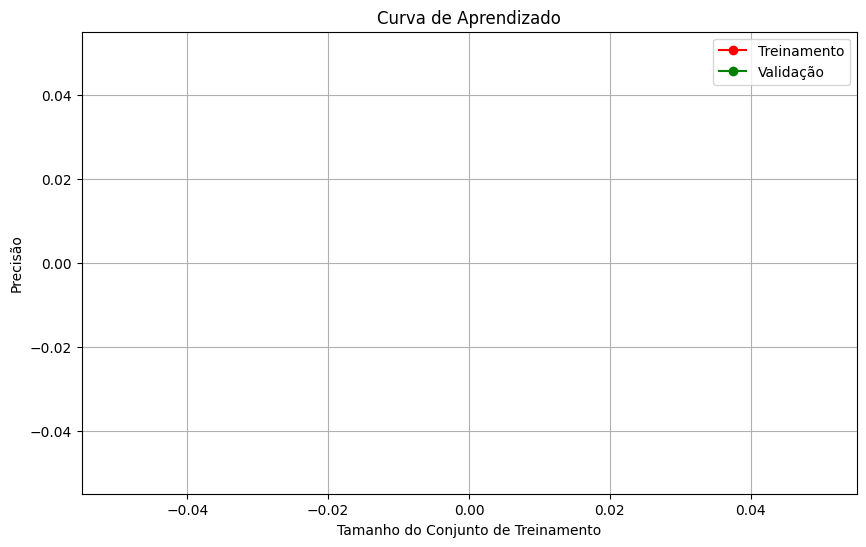

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X_train, Y_train, cv=5, scoring='accuracy', n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Precisão")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validação")

plt.legend(loc="best")
plt.show()


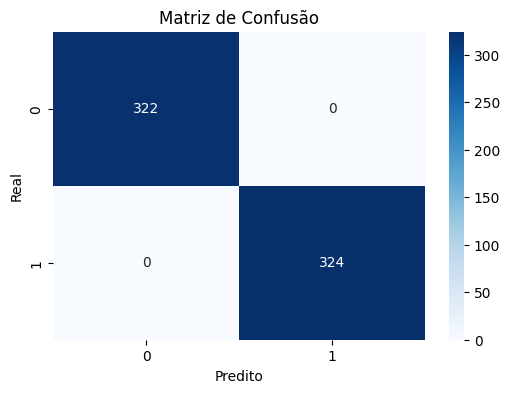

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()


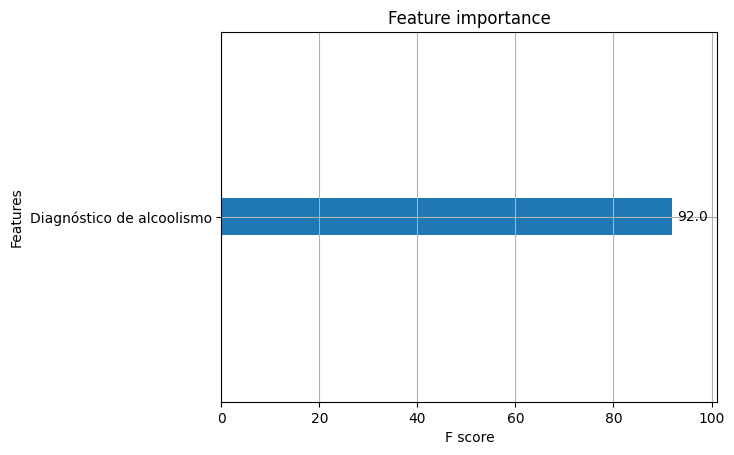

In [25]:
plot_importance(model)
plt.show()


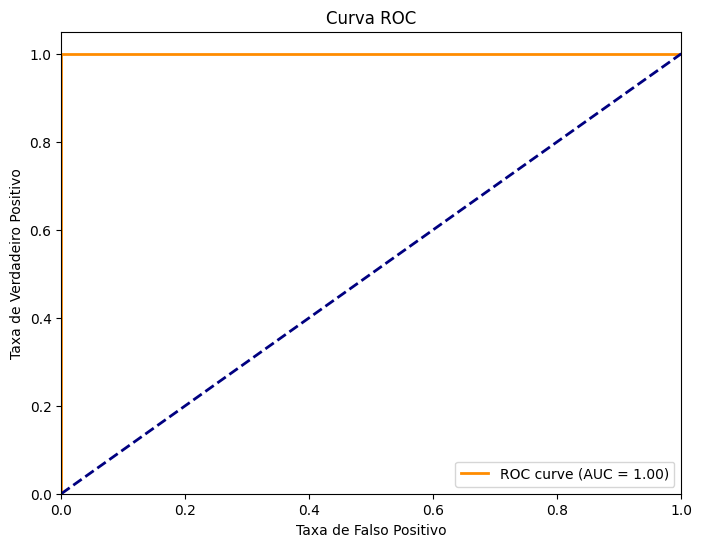

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()
